# Pattern Recognition 2021 - 2022
## Second Set of Analytical Exercises



#### Installation of Packages

In [ ]:
!pip install numpy --upgrade
!pip install sympy --upgrade
!pip install matplotlib --upgrade
!pip install scipy --upgrade
!pip install sklearn --upgrade

#### Import of Libraries

In [50]:
import numpy as np
from numpy import dot, multiply, squeeze, zeros, ones, reshape, array, identity

import pandas as pd

from sympy import Symbol
from sympy import Matrix

import matplotlib.pyplot as plt

from scipy.optimize import minimize
from scipy.optimize import LinearConstraint
from scipy.special import softmax
from scipy.linalg import solve

from sklearn.base import BaseEstimator, ClassifierMixin

from __future__ import division

import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore",category=DeprecationWarning)
warnings.filterwarnings("ignore",category=FutureWarning)

### Exercise 2.1 (SVM)

### Solution #1

In [2]:
c1 = [[3, 3], [2, -2], [-3, -2], [-2, 3]]

c2 = [[1, 1], [0.5, -0.5], [-0.5, -0.5], [-1, 1]]

x_c1 = [a[0] for a in c1]
y_c1 = [a[1] for a in c1]

x_c2 = [a[0] for a in c2]
y_c2 = [a[1] for a in c2]

phi = lambda x: np.array([1, x[0], x[1], (x[0]**2 + x[1]**2 - 5)/3])

classes = ([-1] * 4) + ([1] * 4)
points = c1 + c2
ys = list(map(phi, points))
coeffs = np.zeros((8,8))

In [3]:
for i in range(8):
    for j in range(8):
        coeff = 2 * classes[i] * classes[j] * np.dot(ys[i], ys[j])
        coeffs[i][j] = coeff

        print(f'Coeff for i = {i+1}, j = {j+1}: {coeff:.5f}')
    print('================================')

Coeff for i = 1, j = 1: 75.55556
Coeff for i = 1, j = 2: 10.66667
Coeff for i = 1, j = 3: -4.88889
Coeff for i = 1, j = 4: 31.11111
Coeff for i = 1, j = 5: -5.33333
Coeff for i = 1, j = 6: 11.00000
Coeff for i = 1, j = 7: 17.00000
Coeff for i = 1, j = 8: 6.66667
Coeff for i = 2, j = 1: 10.66667
Coeff for i = 2, j = 2: 20.00000
Coeff for i = 2, j = 3: 3.33333
Coeff for i = 2, j = 4: -12.66667
Coeff for i = 2, j = 5: -0.00000
Coeff for i = 2, j = 6: -3.00000
Coeff for i = 2, j = 7: 1.00000
Coeff for i = 2, j = 8: 8.00000
Coeff for i = 3, j = 1: -4.88889
Coeff for i = 3, j = 2: 3.33333
Coeff for i = 3, j = 3: 42.22222
Coeff for i = 3, j = 4: 16.22222
Coeff for i = 3, j = 5: 13.33333
Coeff for i = 3, j = 6: 7.00000
Coeff for i = 3, j = 7: 1.00000
Coeff for i = 3, j = 8: 1.33333
Coeff for i = 4, j = 1: 31.11111
Coeff for i = 4, j = 2: -12.66667
Coeff for i = 4, j = 3: 16.22222
Coeff for i = 4, j = 4: 42.22222
Coeff for i = 4, j = 5: 1.33333
Coeff for i = 4, j = 6: 11.00000
Coeff for i = 4, 

In [4]:
def print_matrix(A):
    print('')
    for i in range(np.shape(A)[0]):
        print(''.join([f'{x:.5f} ' for x in A[i]]))

In [5]:
print('ys = ')
print_matrix(ys)

ys = 

1.00000 3.00000 3.00000 4.33333 
1.00000 2.00000 -2.00000 1.00000 
1.00000 -3.00000 -2.00000 2.66667 
1.00000 -2.00000 3.00000 2.66667 
1.00000 1.00000 1.00000 -1.00000 
1.00000 0.50000 -0.50000 -1.50000 
1.00000 -0.50000 -0.50000 -1.50000 
1.00000 -1.00000 1.00000 -1.00000 


In [6]:
print_matrix(coeffs)


75.55556 10.66667 -4.88889 31.11111 -5.33333 11.00000 17.00000 6.66667 
10.66667 20.00000 3.33333 -12.66667 -0.00000 -3.00000 1.00000 8.00000 
-4.88889 3.33333 42.22222 16.22222 13.33333 7.00000 1.00000 1.33333 
31.11111 -12.66667 16.22222 42.22222 1.33333 11.00000 7.00000 -6.66667 
-5.33333 -0.00000 13.33333 1.33333 8.00000 5.00000 3.00000 4.00000 
11.00000 -3.00000 7.00000 11.00000 5.00000 7.50000 6.50000 3.00000 
17.00000 1.00000 1.00000 7.00000 3.00000 6.50000 7.50000 5.00000 
6.66667 8.00000 1.33333 -6.66667 4.00000 3.00000 5.00000 8.00000 


In [7]:
A = np.zeros((9,9))

for i in range(8):
    for j in range(8):
        A[i][j] = -1/2 * coeffs[i][j]

for i in range(8):
    A[i][8] = classes[i]

A[8][8] = 0

for i in range(8):
    A[8][i] = classes[i]

print_matrix(A)


-37.77778 -5.33333 2.44444 -15.55556 2.66667 -5.50000 -8.50000 -3.33333 -1.00000 
-5.33333 -10.00000 -1.66667 6.33333 0.00000 1.50000 -0.50000 -4.00000 -1.00000 
2.44444 -1.66667 -21.11111 -8.11111 -6.66667 -3.50000 -0.50000 -0.66667 -1.00000 
-15.55556 6.33333 -8.11111 -21.11111 -0.66667 -5.50000 -3.50000 3.33333 -1.00000 
2.66667 0.00000 -6.66667 -0.66667 -4.00000 -2.50000 -1.50000 -2.00000 1.00000 
-5.50000 1.50000 -3.50000 -5.50000 -2.50000 -3.75000 -3.25000 -1.50000 1.00000 
-8.50000 -0.50000 -0.50000 -3.50000 -1.50000 -3.25000 -3.75000 -2.50000 1.00000 
-3.33333 -4.00000 -0.66667 3.33333 -2.00000 -1.50000 -2.50000 -4.00000 1.00000 
-1.00000 -1.00000 -1.00000 -1.00000 1.00000 1.00000 1.00000 1.00000 0.00000 


In [8]:
b = -np.ones((9,1))
b[8] = 0

print_matrix(b)


-1.00000 
-1.00000 
-1.00000 
-1.00000 
-1.00000 
-1.00000 
-1.00000 
-1.00000 
0.00000 


In [9]:
solution = np.linalg.lstsq(A,b, rcond=None)[0]
print('Solution: ')
print_matrix(solution)

Solution: 

0.03140 
0.03752 
0.05949 
-0.00279 
0.03550 
0.02548 
0.02670 
0.03794 
-0.27918 


In [10]:
w = np.zeros(3)
ys = np.array(ys)

for i in range(8):
    w = w + (solution[i] * classes[i] * ys[i,1:])

print(w)

[ 0.00057423  0.15555655 -0.47648891]


In [11]:
w0 = 1/classes[0] - np.dot(w,ys[0,1:])
print(f'w_0 = {w0}')

w_0 = 0.5963929448353016


In [13]:
w_ = np.zeros(4)
for i in range(3):
    w_[i+1] = w[i]
w_[0] = w0

print(f'w = {w_}')

w = [ 5.96392945e-01  5.74225542e-04  1.55556551e-01 -4.76488909e-01]


In [14]:
print(f'beta = {1/np.linalg.norm(w)}')

beta = 1.995058966677999


In [15]:
@np.vectorize
def g(x1, x2):
    return np.dot(w_, phi([x1, x2]))

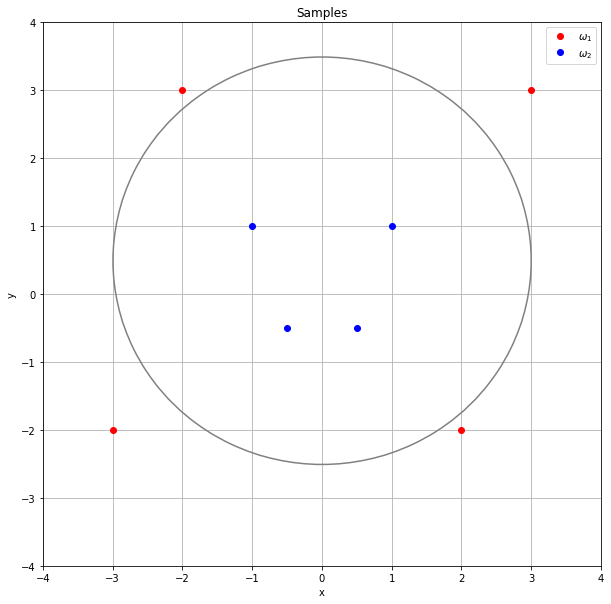

In [16]:
x = np.linspace(-4, 4, 50)
y = np.linspace(-4, 4, 50)

X, Y = np.meshgrid(x, y)
Z = g(X, Y)

plt.figure(figsize=(10,10))
plt.plot(x_c1, y_c1, 'ro', label='$\omega_1$')
plt.plot(x_c2, y_c2, 'bo', label='$\omega_2$')
plt.contour(X, Y, Z, levels=[0], colors="#808080");
plt.title('Samples')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.legend()
plt.show()

In [17]:
print(np.shape(solution))
print()
print(solution)
print()
print(sum([x[0] for x in solution[:-1,:]]))
print()
print([x[0] for x in solution[:-1,:]])
print(np.matmul(A,solution))
print(f'g(sqrt2, sqrt2) = {g(np.sqrt(2), np.sqrt(2))}')
print(f'g(else) = {g(-2, 3)}')

(9, 1)

[[ 0.03139969]
 [ 0.03752476]
 [ 0.0594891 ]
 [-0.00279362]
 [ 0.0354961 ]
 [ 0.02547951]
 [ 0.02670241]
 [ 0.0379419 ]
 [-0.27917927]]

0.2512398510453144

[0.031399690055955165, 0.037524758088926795, 0.059489099823956636, -0.002793622446181216, 0.035496103138193194, 0.025479514008069217, 0.02670241108477989, 0.03794189729161472]
[[-1.31721367e+00]
 [-5.07274289e-01]
 [-1.30429360e+00]
 [-5.25936619e-01]
 [-9.11798957e-01]
 [-9.16421472e-01]
 [-9.15847247e-01]
 [-9.10650506e-01]
 [-3.57353036e-16]]
g(sqrt2, sqrt2) = 0.9760248428242029
g(else) = -0.2087229453635878


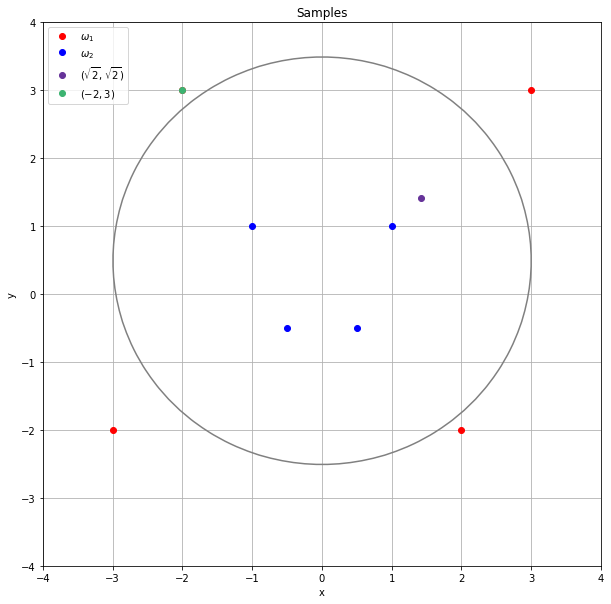

In [18]:
plt.figure(figsize=(10,10))
plt.plot(x_c1, y_c1, 'ro', label='$\omega_1$')
plt.plot(x_c2, y_c2, 'bo', label='$\omega_2$')
plt.plot([np.sqrt(2)], [np.sqrt(2)], 'o', color='rebeccapurple', label='$(\sqrt{2}, \sqrt{2})$')
plt.plot([-2], [3], 'o', color='mediumseagreen', label='$(-2, 3)$')
plt.contour(X, Y, Z, levels=[0], colors="#808080");
plt.title('Samples')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.legend()
plt.show()

### Solution #2 (This solution is included in the report)

##### Question (a)

Question (a):

Plotting data



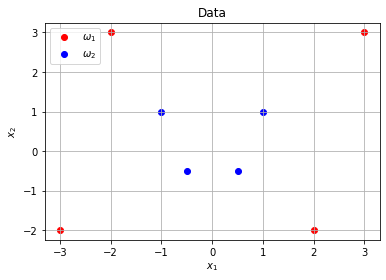

In [19]:
print("Question (a):\n")
print("Plotting data\n")
x_1 = np.array ([3, 2, -3, -2])
y_1 = np.array ([3, -2, -2, 3])
x_2 = np.array ([1, 0.5, -0.5, -1])
y_2 = np.array ([1, -0.5, -0.5, 1])

plt.figure()
plt.scatter(x_1, y_1, color = 'red', label = '$\omega_1$')
plt.scatter(x_2, y_2, color = 'blue', label = '$\omega_2$')
plt.grid()
plt.legend(loc = 'best')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('Data')
plt.show()

print("=======================================================\n")

In [20]:
print("The new data using phi functions will be: \n")
x = np.array([[3, 3], [2, -2], [-3, -2], [-2, 3],
              [1, 1], [0.5, -0.5], [-0.5, -0.5], [-1, 1]])

def new_data(x):
  return [1, x[0], x[1], (x[0]**2 + x[1]**2 - 5)/3]

res = np.array([new_data(data) for data in x])

print(res)
print()
print("=======================================================\n")

The new data using phi functions will be: 

[[ 1.          3.          3.          4.33333333]
 [ 1.          2.         -2.          1.        ]
 [ 1.         -3.         -2.          2.66666667]
 [ 1.         -2.          3.          2.66666667]
 [ 1.          1.          1.         -1.        ]
 [ 1.          0.5        -0.5        -1.5       ]
 [ 1.         -0.5        -0.5        -1.5       ]
 [ 1.         -1.          1.         -1.        ]]




##### Question (b)

In [21]:
print("Question (b):\n")
print("Calculation of Lagrange Coefficients\n")

z = np.array([-1, -1, -1, -1, 1, 1, 1, 1])
N = 8

def Langrange(a):
  tmp1 = 0
  tmp2 = 0
  for a_i in a:
    tmp1 = tmp1 + a_i
  for i in range(N):
    for j in range(N):
      tmp2 = tmp2 + a[i]*a[j]*z[i]*z[j]*np.matmul(res[j], res[i])
  
  return -(tmp1 - (1/2)*tmp2)

print("=======================================================\n")

Question (b):

Calculation of Lagrange Coefficients




In [22]:
print("The Lagrangian Coefficients will be: \n")

lin_cons = LinearConstraint([[z[0],z[1],z[2],z[3],z[4],z[5],z[6],z[7]],
                             [1,0,0,0,0,0,0,0], [0,1,0,0,0,0,0,0],
                             [0,0,1,0,0,0,0,0], [0,0,0,1,0,0,0,0],
                             [0,0,0,0,1,0,0,0], [0,0,0,0,0,1,0,0],
                             [0,0,0,0,0,0,1,0], [0,0,0,0,0,0,0,1]],
                             [0,0,0,0,0,0,0,0,0], [0, np.inf, np.inf, np.inf, 
                             np.inf, np.inf, np.inf, np.inf, np.inf])

coeff = minimize(Langrange, [1,1,1,1,1,1,1,1], constraints = lin_cons)
coeff_rounded = np.round(coeff['x'], 5)
print(coeff_rounded)
print()
print("=======================================================\n")

The Lagrangian Coefficients will be: 

[0.      0.14678 0.      0.10013 0.16178 0.0107  0.0012  0.07323]




##### Question (c)

In [23]:
print("Question (c):\n")
print("The weight vectors w/o w0 will be:\n")

weight = np.zeros(3)

for w in range(N):
  weight = weight + coeff_rounded[w]*z[w]*res[w][1:]

print(weight)
print()
print("=======================================================\n")

Question (c):

The weight vectors w/o w0 will be:

[ 0.          0.22223    -0.66665333]




In [24]:
print("The w0 for all of the support vectors will be:\n")

for i in range(N):
  if i != 0 and i != 2:
    w_0 = np.round(1/z[i] - np.matmul(weight, res[i][1:]), 3)
    print(w_0)
print()
print("=======================================================\n")

The w0 for all of the support vectors will be:

0.111
0.111
0.111
0.111
0.111
0.111




In [25]:
print("The augmented weight vector will be:\n")

augmented_weight = np.append(np.array(w_0), weight)
print(augmented_weight)
print()
print("=======================================================\n")

The augmented weight vector will be:

[ 0.111       0.          0.22223    -0.66665333]




##### Question (d)

In [26]:
print("Question (d):\n")
print("The beta margin will be:\n")
beta = 1/np.linalg.norm(augmented_weight)
print(beta)
print()
print("=======================================================\n")

Question (d):

The beta margin will be:

1.4056180082863914




##### Question (e)

In [27]:
print("Question (e):\n")
print("The separation function will be:\n")

x1 = Symbol("x1")
x2 = Symbol("x2")

w_s = Matrix(augmented_weight).T
x_s = Matrix([1, x1, x2, (x1**2 + x2**2-5)/3])

sep_fun = w_s*x_s

print(sep_fun)
print()
print("=======================================================\n")

Question (e):

The separation function will be:

Matrix([[-0.222217777777778*x1**2 - 0.222217777777778*x2**2 + 0.22223*x2 + 1.22208888888889]])




Plotting Separation Function



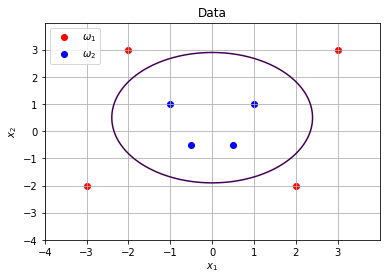

In [28]:
print("Plotting Separation Function\n")

dim = np.arange(-4, 4, 0.001)
x1, x2 = np.meshgrid(dim, dim)

plt.figure()
plt.contour(x1, x2, - 0.222217*x1**2 - 0.222217*x2**2 + 0.22223*x2 + 1.222088, [0])
plt.scatter(x_1, y_1, color = 'red', label = '$\omega_1$')
plt.scatter(x_2, y_2, color = 'blue', label = '$\omega_2$')
plt.grid()
plt.legend(loc = 'best')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('Data')
plt.show()

print("=======================================================\n")

##### Question (st)

In [29]:
print("Question (st):\n")
print("The support vectors will be all except w1 & x3\n")
print("=======================================================\n")

Question (st):

The support vectors will be all except w1 & x3




##### Question (Z)

Question (z):

Plotting for new data classification will be:



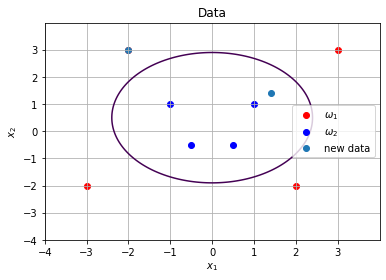

In [30]:
print("Question (z):\n")
print("Plotting for new data classification will be:\n")

plt.figure()
plt.contour(x1, x2, - 0.222217*x1**2 - 0.222217*x2**2 + 0.22223*x2 + 1.222088, [0])
plt.scatter(x_1, y_1, color = 'red', label = '$\omega_1$')
plt.scatter(x_2, y_2, color = 'blue', label = '$\omega_2$')
plt.scatter([np.sqrt(2), -2], [np.sqrt(2),3] , label="new data")
plt.grid()
plt.legend(loc = 'best')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('Data')
plt.show()

print()
print("=======================================================\n")

### Exercise 2.2 (HMM)

##### Question (1)

In [31]:
print("Question (1):\n")
print("The forward algorithm was calculated in the report by hand\n")
print("=======================================================\n")

Question (1):

The forward algorithm was calculated in the report by hand




##### Question (2)

In [32]:
print("Question (2):\n")
print("The backward algorithm was calculated in the report by hand\n")
print("=======================================================\n")

Question (2):

The backward algorithm was calculated in the report by hand




##### Question (3)

In [33]:
print("Question (3):\n")

states = ('state 1', 'state 2', 'state 3')
start_probability = {'state 1': 1/3, 'state 2': 1/3, 'state 3' : 1/3}
transition_probability = {
    'state 1': {'state 1': 1/3, 'state 2': 1/3, 'state 3': 1/3},
    'state 2': {'state 1': 1/3, 'state 2': 1/3, 'state 3': 1/3},
    'state 3': {'state 1': 1/3, 'state 2': 1/3, 'state 3': 1/3},}
emission_probability = {'state 1': {'H': 0.50, 'T': 0.50},
                        'state 2': {'H': 0.75, 'T': 0.25},
                        'state 3': {'H': 0.25, 'T': 0.75},}
seq = 'HTH'
observations = list(seq)

print("=======================================================\n")

Question (3):




In [34]:
print("The Viterbi algorithm was calculated bellow\n")

def viterbi(obs, states, start_p, trans_p, emit_p):
  V = [{}]
  path = {}
  for y in states:
    V[0][y] = start_p[y]*emit_p[y][obs[0]]
    path[y] = [y]
  for t in range(1, len(obs)):
    V.append({})
    newpath = {}
    for y in states:
      (prob, state) = max((V[t-1][y0]*trans_p[y0][y]*emit_p[y][obs[t]],y0) for y0 in states)
      V[t][y] = prob
      newpath[y] = path[state] + [y]
    
    path = newpath
  
  n = 0           
  if len(obs) != 1:
    n = t
  print(V)
  (prob, state) = max((V[n][y], y) for y in states)

  return (prob, path[state])

print("=======================================================\n")

The Viterbi algorithm was calculated bellow




In [35]:
print("The results of the Viterbi algorithm will be:\n")
result = viterbi(observations, states, start_probability, transition_probability, emission_probability)
print()
print("Best path:", result[1], "\n")
print("Probability value: ", result[0], "\n")
print("=======================================================\n")

The results of the Viterbi algorithm will be:

[{'state 1': 0.16666666666666666, 'state 2': 0.25, 'state 3': 0.08333333333333333}, {'state 1': 0.041666666666666664, 'state 2': 0.020833333333333332, 'state 3': 0.0625}, {'state 1': 0.010416666666666666, 'state 2': 0.015625, 'state 3': 0.005208333333333333}]

Best path: ['state 2', 'state 3', 'state 2'] 

Probability value:  0.015625 




##### Question (4)

In [36]:
print("Question (4):\n")

seq_new = 'HHHHHHTTHHHHHHHH'
observations = list(seq_new)

print("=======================================================\n")

Question (4):




In [37]:
print("The Viterbi training was calculated bellow\n")

epsilon = pow(10,-10)
prob_prev = 0
IterMax = 15

for Niter in range(IterMax):
  result = viterbi(observations, states, start_probability, transition_probability, emission_probability)
  print("".join(["Best path probability ", "%.10f" % result[0], "\n"]))
  
  if ((result[0] - prob_prev) < epsilon): break
  if (result[0] < prob_prev): print("Something is wrong because Probability is decreasing...")
  
  prob_prev = result[0]
  less = list(result[1])
  less.pop()  
  
  for i in states:
    ni = less.count(i)
    if (ni == 0):
      ni = epsilon
    for j in states:
      a = ' '.join(result[1])
      b = ' '.join([i,j])
      nij = sum(a[x:].startswith(b) for x in range(len(a)))
      transition_probability[i][j] = nij/ni
  for j in states:
    nj = result[1].count(j)
    if (nj == 0):
      nj = epsilon
    indices = [i for i, x in enumerate(result[1]) if x == j]
    obsj = [observations[x] for x in indices]
    for obs in ['H', 'T']:
      nrj = obsj.count(obs)
      emission_probability[j][obs] = nrj/nj
        
print("=======================================================\n")

The Viterbi training was calculated bellow

[{'state 1': 0.16666666666666666, 'state 2': 0.25, 'state 3': 0.08333333333333333}, {'state 1': 0.041666666666666664, 'state 2': 0.0625, 'state 3': 0.020833333333333332}, {'state 1': 0.010416666666666666, 'state 2': 0.015625, 'state 3': 0.005208333333333333}, {'state 1': 0.0026041666666666665, 'state 2': 0.00390625, 'state 3': 0.0013020833333333333}, {'state 1': 0.0006510416666666666, 'state 2': 0.0009765625, 'state 3': 0.0003255208333333333}, {'state 1': 0.00016276041666666666, 'state 2': 0.000244140625, 'state 3': 8.138020833333333e-05}, {'state 1': 4.0690104166666664e-05, 'state 2': 2.0345052083333332e-05, 'state 3': 6.103515625e-05}, {'state 1': 1.0172526041666666e-05, 'state 2': 5.086263020833333e-06, 'state 3': 1.52587890625e-05}, {'state 1': 2.5431315104166665e-06, 'state 2': 3.814697265625e-06, 'state 3': 1.2715657552083333e-06}, {'state 1': 6.357828776041666e-07, 'state 2': 9.5367431640625e-07, 'state 3': 3.178914388020833e-07}, {'st

In [38]:
print("The Viterbi training results will be:\n")
print(transition_probability, "\n")
print(emission_probability, "\n")
print("=======================================================\n")

The Viterbi training results will be:

{'state 1': {'state 1': 0.0, 'state 2': 0.0, 'state 3': 0.0}, 'state 2': {'state 1': 0.0, 'state 2': 0.9230769230769231, 'state 3': 0.07692307692307693}, 'state 3': {'state 1': 0.0, 'state 2': 0.5, 'state 3': 0.5}} 

{'state 1': {'H': 0.0, 'T': 0.0}, 'state 2': {'H': 1.0, 'T': 0.0}, 'state 3': {'H': 0.0, 'T': 1.0}} 




##### Question (5)

In [39]:
print("Question (5):\n")
print("The differences can be found in the report\n")
print("=======================================================\n")

Question (5):

The differences can be found in the report




### Exercise 2.4 (MLP Backpropagation)

In [40]:
sigma = lambda x: 1/(1+np.exp(-x))

w1 = -1.7
w2 =  0.1
w3 = -0.6
w4 = -1.8
w5 = -0.2
w6 =  0.5

wa = [w1, w2]
wb = [w3, w4]
wc = [w5, w6]

def forward(x):
    h1 = sigma(np.dot(wa, x1))
    print(f'h1 = {h1}')
    h2 = sigma(np.dot(wb, x2))
    print(f'h2 = {h2}')
    y = sigma(np.dot(wc, [h1, h2]))
    print(f'y = {y}')
    return y

x1 = [-0.5, 1.4]
x2 = [0.9, -3]

print(forward(x))


h1 = 0.7290879223493065
h2 = 0.9923091241184917
y = 0.5866992927190862
0.5866992927190862


### Exercise 2.9 (Logistic Regression)

(C)

In [41]:
with open('MLR.data', 'r') as file:
  newfile = file.read()

newfile = newfile.replace(' ', ',')

with open('MLR.data', 'w') as file:
  file.write(newfile)

In [44]:
df = pd.read_csv('MLR.data', na_values = '?', header = None) 
print("Print first 5 recs:\n")
print(df.head())

t = np.array(df[2])
del df[2]
X = np.array(df)
K = np.unique(t)

Print first 5 recs:

          0         1  2
0 -3.605388  3.012493  0
1  8.941356  2.108067  1
2  4.161469 -2.959369  2
3  0.047052  4.166693  0
4  6.749173  1.589336  1


##### Logistic Regression

In [48]:
class LogisticRegression(BaseEstimator, ClassifierMixin):
    def __init__(self, K, maxiter=10):        
        self.W = None
        self.K = K
        self.maxiter = maxiter
    
    @staticmethod
    def stable_softmax(x):
        z = x - max(x)
        numerator = np.exp(z)
        denominator = np.sum(numerator)
        softmax = numerator/denominator
        return softmax

    @staticmethod
    def softmax(W, X, K):
        N = X.shape[0]
        M = X.shape[1]
        softmax_all = zeros((N,K))
        for i,xn in enumerate(X):
            xn = reshape(xn, (M,1))
            A = []
            for k in range(K):
                a_nk = squeeze(dot( reshape(W[k], (1,M)), xn ))
                A.append(a_nk)
            softmax_all[i,:] = reshape(array(stable_softmax(A)), (1,K))    
        return softmax_all
        
    def fit(self, X, t):
        K = self.K
        X_t = X.transpose()
        N = X.shape[0]
        M = X.shape[1]
        I = np.identity(K)
        T = zeros((N,K))

        for i,k in enumerate(t):
            T[i][k] = 1
        
        self.W = zeros(shape=(K,M))
        grad = ones(shape=(K,M)) 
        H = ones(shape=(K*M,K*M))

        for iteration in range(self.maxiter):
            Y = softmax(W, X, K)
            grad = dot( X_t, Y - T ).transpose()
            for k in range(K):
                for j in range(K):
                    Ikj = I[k][j]
                    R = zeros((N,N)) 
                    for n in range(N):
                        R[n][n] = Y[n][k] * (Ikj - Y[n][j])

                    H[k*M:k*M+M, j*M:j*M+M] = dot( dot(X_t, R), X )              

            self.W = reshape(self.W, (K*M,1))
            grad = reshape(grad, (K*M,1))
            Wnew = self.W - dot( np.linalg.pinv(H), grad )
            grad = reshape(grad, (K,M))
            self.W = reshape(Wnew, (K,M))
            continue
        return self
        
    def predict(self, X):
        solve = softmax(W, X, self.K)
        y_predict = np.argmax(solve, axis=1)
        return y_predict
    
    def score(self, X, y_truth): 
        y_predict = self.predict(X)
        return ( np.sum([y_predict == y_truth]) ) / ( len(y_predict) )

In [ ]:
lr = LogisticRegression(K=3, maxiter=5)
lr.fit(X, t)
print("IRLS LogisticRegression Score:\t", lr.score(X, t) * 100, "%")
print("Final W:\n", lr.W)

IRLS LogisticRegression Score:	 100.0 %
Final W:
 [[-0.35798298  1.48913729]
 [ 0.39032115  0.39589378]
 [-0.03233817 -1.88503107]]


In [54]:
def plt_decision_boundaries(clf, X, y, labels, plot_labels):
    fig, ax = plt.subplots()
    title = ('Decision surface of Classifier')
    X0, X1 = X[:,0], X[:,1]
    x_min, x_max = X0.min() - 0.2, X0.max() + 0.2
    y_min, y_max = X1.min() - 0.2, X1.max() + 0.2
    xx, yy = np.meshgrid(np.arange(x_min, x_max, .05), np.arange(y_min, y_max, .05))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    colors = ['red', 'yellow', 'blue']  
    
    for label in labels:
        ax.scatter(
            X0[y == label], X1[y == label],
            c=(colors[int(label)]), label=int(label),
            s=60, alpha=0.9, edgecolors='k'
        )
    
    ax.set_ylabel(plot_labels[1])
    ax.set_xlabel(plot_labels[0])
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)
    ax.legend()
    plt.show()

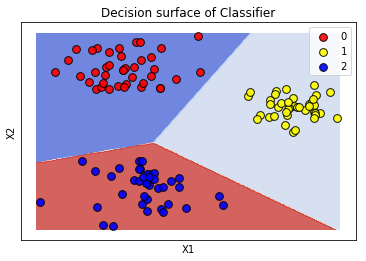

In [ ]:
lr = LogisticRegression(K=3, maxiter=5)
lr.fit(X, t)
plt_decision_boundaries(lr, X, t, np.arange(3), ["X1", "X2"])

##### Linear Regression

In [55]:
class LinearRegression(BaseEstimator, ClassifierMixin):
    def __init__(self, K):
        self.Wml = None
        self.K = K
        
    def fit(self, X, t):
        K = self.K
        N = X.shape[0]
        M = X.shape[1]    
        X_t = X.transpose()
        T = zeros((N,K))
        for i,k in enumerate(t):
            T[i][k] = 1
        pseudo_inv = dot( np.linalg.pinv(dot(X_t, X)), X_t )
        self.Wml = dot( pseudo_inv, T)
        return self
        
    def predict(self, X):
        Y = dot( X, self.Wml )
        y_predict = np.argmax(Y, axis=1)
        return y_predict
    
    def score(self, X, y_truth):
        y_predict = self.predict(X)
        return ( np.sum([y_predict == y_truth]) ) / ( len(y_predict) )

In [ ]:
lr = LinearRegression(K=3)
lr.fit(X, t)
print("Normal Equations LinearRegression Score:\t", lr.score(X, t) * 100, "%")
print("Wml:\n", lr.Wml)

Normal Equations LinearRegression Score:	 99.16666666666667 %
Wml:
 [[-0.03973394  0.09163179  0.00441572]
 [ 0.15567397  0.0324988  -0.08580454]]


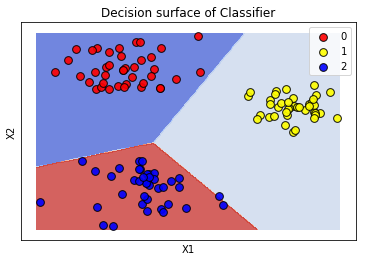

In [ ]:
lr = LinearRegression(K=3)
lr.fit(X, t)
plt_decision_boundaries(lr, X, t, np.arange(3), ["X1", "X2"])